In [257]:
import pandas as pd

### List of Orders.csv

In [258]:
df_List_of_Orders = pd.read_csv('List of Orders.csv')
df_List_of_Orders

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata
...,...,...,...,...,...
555,NaN,NaN,NaN,NaN,NaN
556,NaN,NaN,NaN,NaN,NaN
557,NaN,NaN,NaN,NaN,NaN
558,NaN,NaN,NaN,NaN,NaN


In [259]:
df_List_of_Orders.shape

(560, 5)

In [260]:
df_List_of_Orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 22.0+ KB


In [261]:
df_List_of_Orders.isnull().sum()

Order ID        60
Order Date      60
CustomerName    60
State           60
City            60
dtype: int64

In [262]:
df_List_of_Orders = df_List_of_Orders.dropna(how='all')

In [263]:
df_List_of_Orders.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


In [264]:
df_List_of_Orders["Order Date"] = pd.to_datetime(df_List_of_Orders["Order Date"], format='%d-%m-%Y')

C:\Users\trinh\AppData\Local\Temp\ipykernel_19680\1549737745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_List_of_Orders["Order Date"] = pd.to_datetime(df_List_of_Orders["Order Date"], format='%d-%m-%Y')


In [265]:
print(df_List_of_Orders.duplicated().sum())

0


### Order Details.csv

In [266]:
df_Order_Details = pd.read_csv('Order Details.csv')
df_Order_Details

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones
...,...,...,...,...,...,...
1495,B-26099,835.0,267.0,5,Electronics,Phones
1496,B-26099,2366.0,552.0,5,Clothing,Trousers
1497,B-26100,828.0,230.0,2,Furniture,Chairs
1498,B-26100,34.0,10.0,2,Clothing,T-shirt


In [267]:
df_Order_Details.shape

(1500, 6)

In [268]:
df_Order_Details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Amount        1500 non-null   float64
 2   Profit        1500 non-null   float64
 3   Quantity      1500 non-null   int64  
 4   Category      1500 non-null   object 
 5   Sub-Category  1500 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 70.4+ KB


In [269]:
df_Order_Details.isnull().sum()

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
dtype: int64

In [270]:
print(df_Order_Details.duplicated().sum())

0


In [271]:
print(df_Order_Details[['Amount', 'Profit', 'Quantity']].describe())

            Amount       Profit     Quantity
count  1500.000000  1500.000000  1500.000000
mean    287.668000    15.970000     3.743333
std     461.050488   169.140565     2.184942
min       4.000000 -1981.000000     1.000000
25%      45.000000    -9.250000     2.000000
50%     118.000000     9.000000     3.000000
75%     322.000000    38.000000     5.000000
max    5729.000000  1698.000000    14.000000


In [272]:
import seaborn as sns
import matplotlib.pyplot as plt

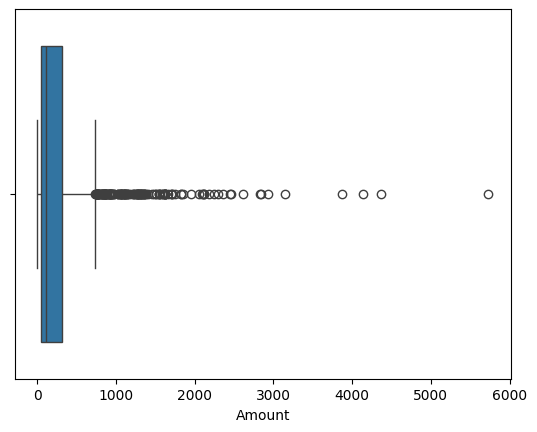

In [273]:
sns.boxplot(x=df_Order_Details['Amount'])
plt.show()

In [274]:
def cap_amount_outliers(df):
    Q1 = df['Amount'].quantile(0.25)
    Q3 = df['Amount'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_clean = df.copy()
    
    df_clean.loc[df_clean['Amount'] < lower_bound, 'Amount'] = lower_bound
    df_clean.loc[df_clean['Amount'] > upper_bound, 'Amount'] = upper_bound
    
    return df_clean

df_Order_Details = cap_amount_outliers(df_Order_Details)

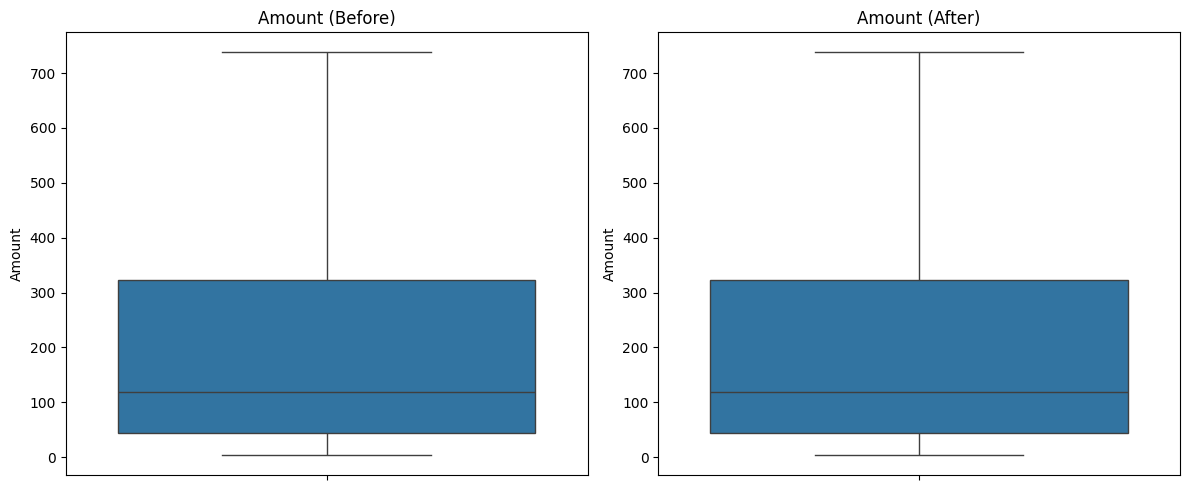

In [275]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=df_Order_Details['Amount'], ax=ax1)
ax1.set_title('Amount (Before)')

sns.boxplot(y=df_Order_Details['Amount'], ax=ax2)
ax2.set_title('Amount (After)')

plt.tight_layout()
plt.show()

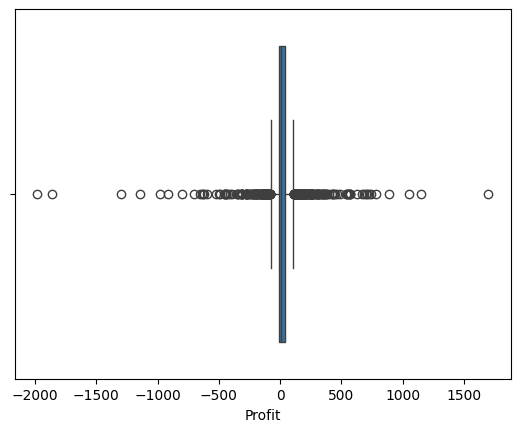

In [276]:
sns.boxplot(x=df_Order_Details['Profit'])
plt.show()

In [277]:
def replace_profit_outliers_with_median(df):
    Q1 = df['Profit'].quantile(0.25)
    Q3 = df['Profit'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    median_value = df['Profit'].median()
    
    df_clean = df.copy()
    
    df_clean.loc[df_clean['Profit'] < lower_bound, 'Profit'] = median_value
    df_clean.loc[df_clean['Profit'] > upper_bound, 'Profit'] = median_value
    
    return df_clean

df_Order_Details = replace_profit_outliers_with_median(df_Order_Details)

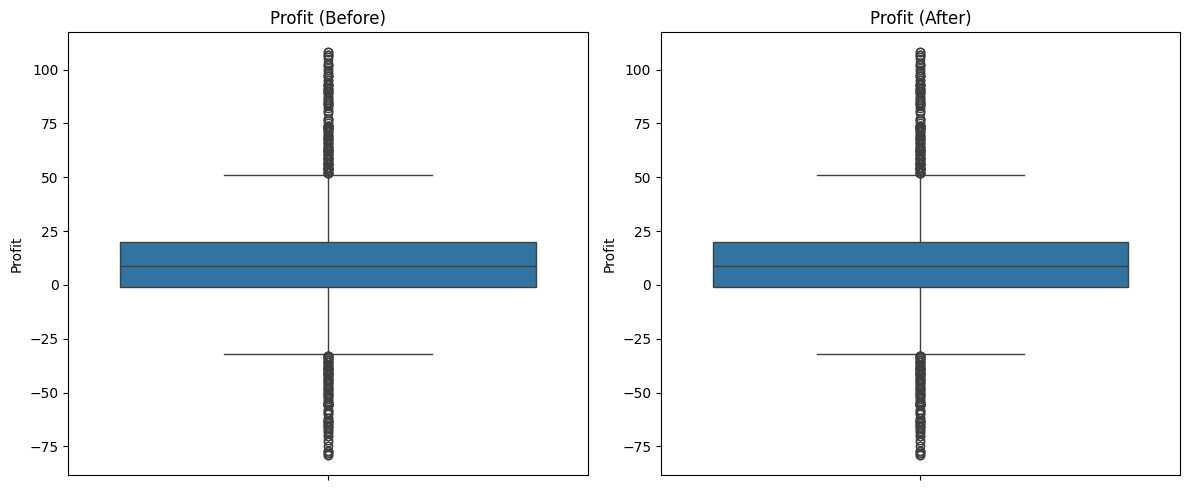

In [278]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=df_Order_Details['Profit'], ax=ax1)
ax1.set_title('Profit (Before)')

sns.boxplot(y=df_Order_Details['Profit'], ax=ax2)
ax2.set_title('Profit (After)')

plt.tight_layout()
plt.show()

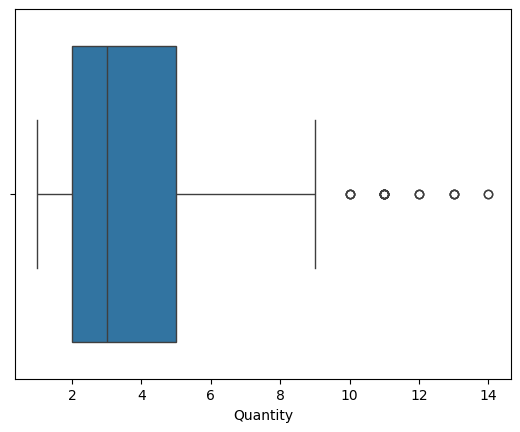

In [279]:
sns.boxplot(x=df_Order_Details['Quantity'])
plt.show()

In [280]:
def remove_quantity_outliers(df):
    Q1 = df['Quantity'].quantile(0.25)
    Q3 = df['Quantity'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_clean = df.copy()
    
    df_clean = df_clean[(df_clean['Quantity'] >= lower_bound) & 
                       (df_clean['Quantity'] <= upper_bound)]
    
    return df_clean

df_Order_Details = remove_quantity_outliers(df_Order_Details)

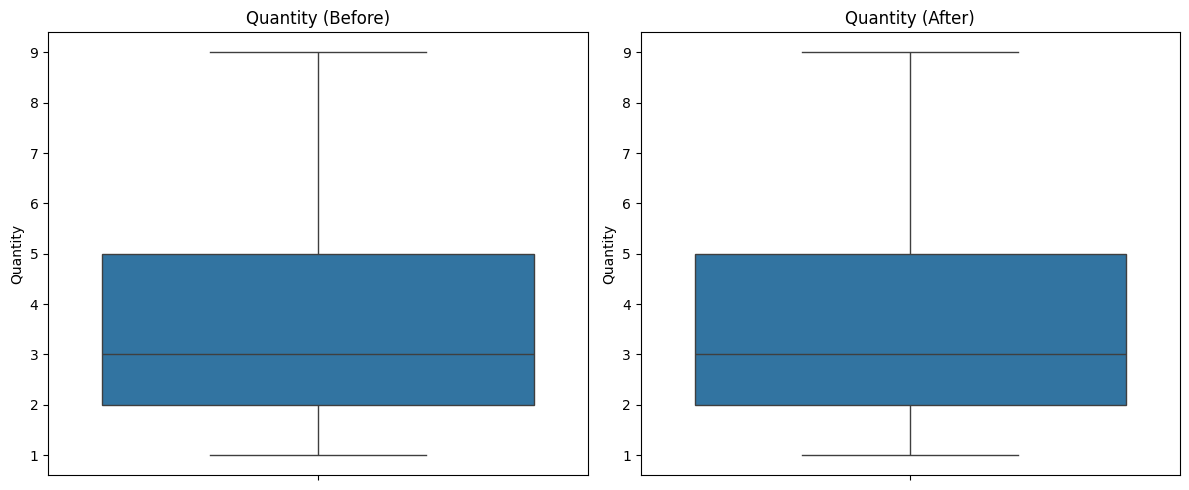

In [281]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=df_Order_Details['Quantity'], ax=ax1)
ax1.set_title('Quantity (Before)')

sns.boxplot(y=df_Order_Details['Quantity'], ax=ax2)
ax2.set_title('Quantity (After)')

plt.tight_layout()
plt.show()

### Sales target.csv

In [282]:
df_Sales_target = pd.read_csv('Sales target.csv')
df_Sales_target

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0
5,Sep-18,Furniture,11000.0
6,Oct-18,Furniture,11100.0
7,Nov-18,Furniture,11300.0
8,Dec-18,Furniture,11400.0
9,Jan-19,Furniture,11500.0


In [283]:
df_Sales_target.shape

(36, 3)

In [284]:
df_Sales_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month of Order Date  36 non-null     object 
 1   Category             36 non-null     object 
 2   Target               36 non-null     float64
dtypes: float64(1), object(2)
memory usage: 996.0+ bytes


In [285]:
df_Sales_target.isnull().sum()

Month of Order Date    0
Category               0
Target                 0
dtype: int64

In [286]:
df_Sales_target[['Target']].describe()

,Target
count,36.000000
mean,12108.333333
std,2667.837541
min,9000.000000
25%,10050.000000
50%,11450.000000
75%,14500.000000
max,16000.000000


In [287]:
df_Sales_target.duplicated().sum()

0

In [288]:
df_Sales_target['temp_date'] = pd.to_datetime(df_Sales_target['Month of Order Date'], format='%b-%y')

In [289]:
df_Sales_target['Month'] = df_Sales_target['temp_date'].dt.month
df_Sales_target['Year'] = df_Sales_target['temp_date'].dt.strftime('%Y')

In [290]:
df_Sales_target = df_Sales_target.drop(['Month of Order Date', 'temp_date'], axis=1)

In [291]:
df_Sales_target

,Category,Target,Month,Year
0,Furniture,10400.0,4,2018
1,Furniture,10500.0,5,2018
2,Furniture,10600.0,6,2018
3,Furniture,10800.0,7,2018
4,Furniture,10900.0,8,2018
5,Furniture,11000.0,9,2018
6,Furniture,11100.0,10,2018
7,Furniture,11300.0,11,2018
8,Furniture,11400.0,12,2018
9,Furniture,11500.0,1,2019


In [292]:
for category in df_Sales_target['Category'].unique():
    category_data = df_Sales_target[df_Sales_target['Category'] == category]
    
    Q1 = category_data['Target'].quantile(0.25)
    Q3 = category_data['Target'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = category_data[(category_data['Target'] < lower_bound) | 
                            (category_data['Target'] > upper_bound)]

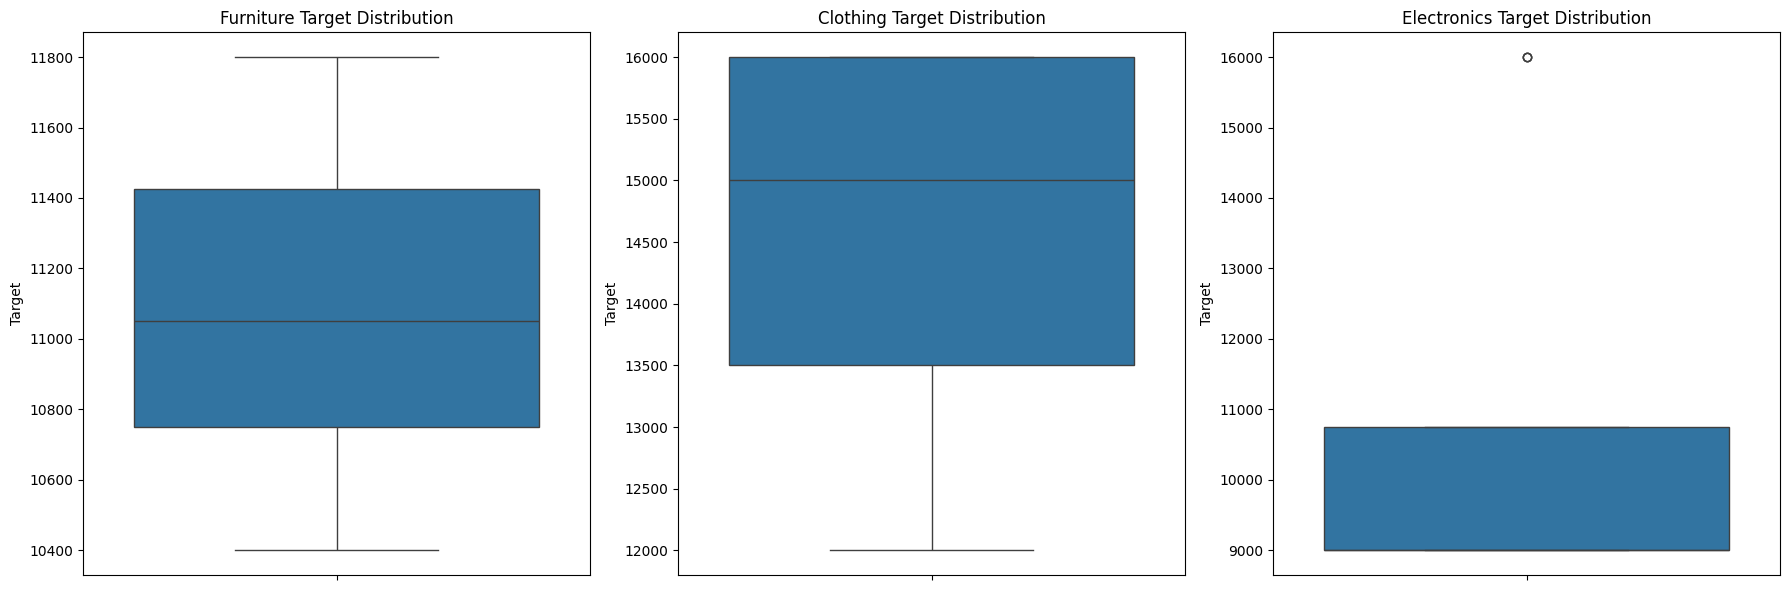

In [293]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(y=df_Sales_target[df_Sales_target['Category'] == 'Furniture']['Target'], ax=ax1)
ax1.set_title('Furniture Target Distribution')
ax1.set_ylabel('Target')

sns.boxplot(y=df_Sales_target[df_Sales_target['Category'] == 'Clothing']['Target'], ax=ax2)
ax2.set_title('Clothing Target Distribution')
ax2.set_ylabel('Target')

sns.boxplot(y=df_Sales_target[df_Sales_target['Category'] == 'Electronics']['Target'], ax=ax3)
ax3.set_title('Electronics Target Distribution')
ax3.set_ylabel('Target')

plt.tight_layout()
plt.show()

C:\Users\trinh\AppData\Local\Temp\ipykernel_19680\1079436979.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['Time'] = category_data['Month'].astype(str) + '-' + category_data['Year']
C:\Users\trinh\AppData\Local\Temp\ipykernel_19680\1079436979.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['Time'] = category_data['Month'].astype(str) + '-' + category_data['Year']
C:\Users\trinh\AppData\Local\Temp\ipykernel_19680\1079436979.py:4: SettingWithCopyWarning: 
A value is tryin

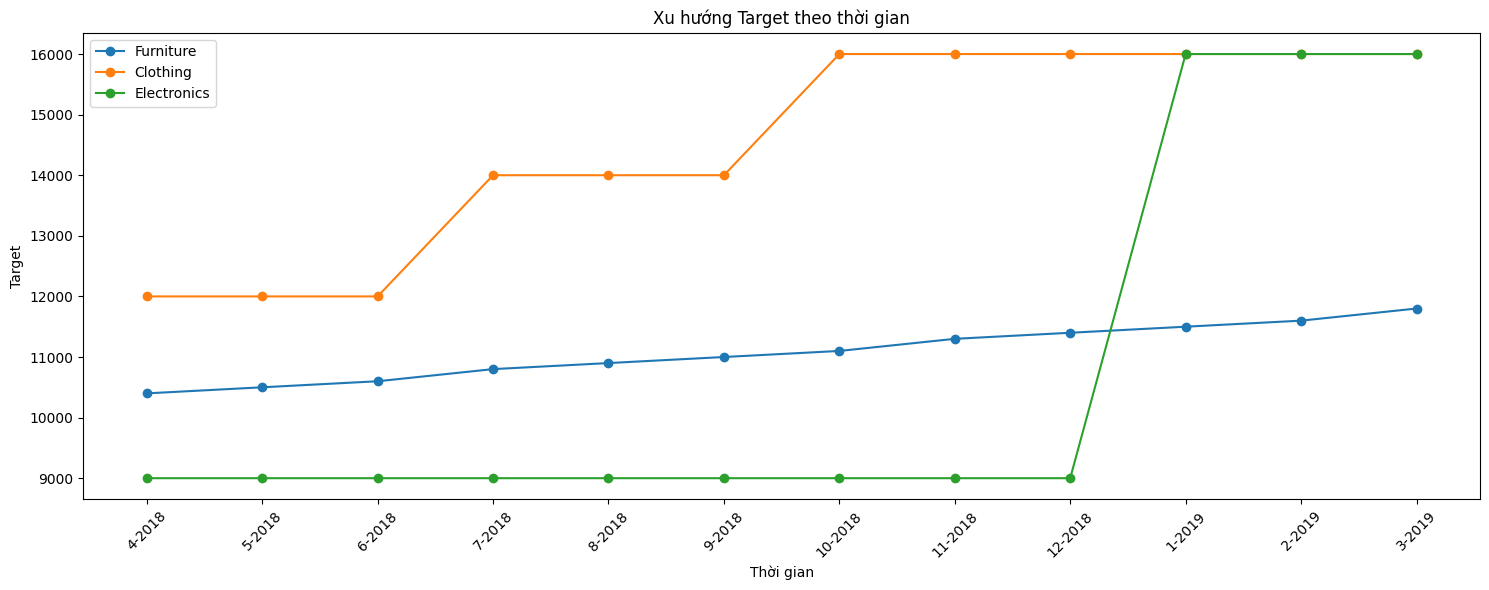

In [294]:
plt.figure(figsize=(15, 6))
for category in df_Sales_target['Category'].unique():
    category_data = df_Sales_target[df_Sales_target['Category'] == category]
    category_data['Time'] = category_data['Month'].astype(str) + '-' + category_data['Year']
    plt.plot(category_data['Time'], category_data['Target'], 
             marker='o', label=category)

plt.title('Xu hướng Target theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Target')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Thống kê Target theo Category:
                mean   median      min      max          std
Category                                                    
Clothing     14500.0  15000.0  12000.0  16000.0  1732.050808
Electronics  10750.0   9000.0   9000.0  16000.0  3165.869118
Furniture    11075.0  11050.0  10400.0  11800.0   453.521574


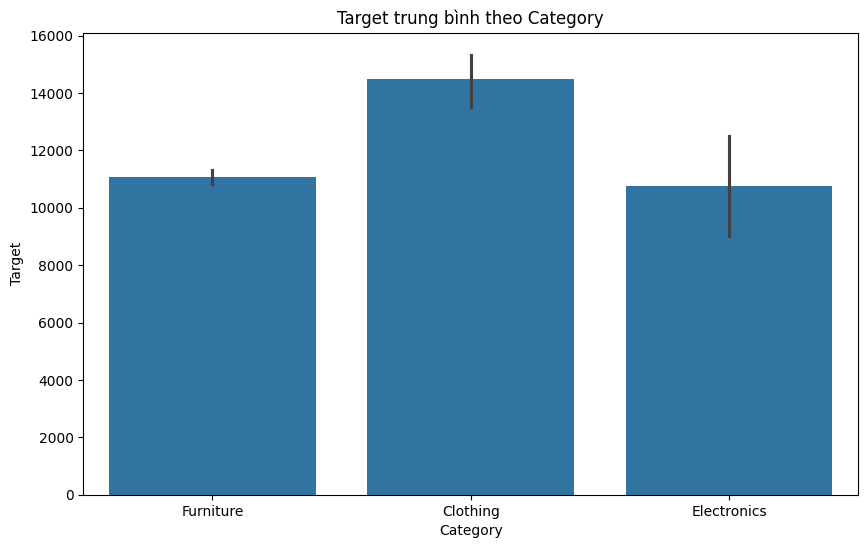

In [295]:
category_stats = df_Sales_target.groupby('Category')['Target'].agg(['mean', 'median', 'min', 'max', 'std'])
print("\nThống kê Target theo Category:")
print(category_stats)

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Target', data=df_Sales_target)
plt.title('Target trung bình theo Category')
plt.show()


Target trung bình theo tháng:
Month
1     14500.000000
2     14533.333333
3     14600.000000
4     10466.666667
5     10500.000000
6     10533.333333
7     11266.666667
8     11300.000000
9     11333.333333
10    12033.333333
11    12100.000000
12    12133.333333
Name: Target, dtype: float64


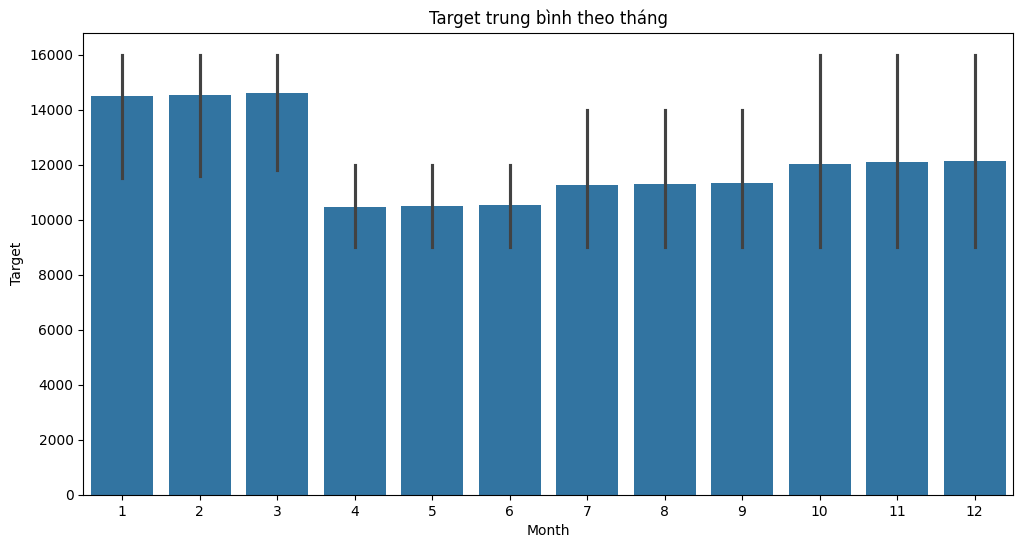

In [296]:
monthly_stats = df_Sales_target.groupby('Month')['Target'].mean()
print("\nTarget trung bình theo tháng:")
print(monthly_stats)

plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Target', data=df_Sales_target)
plt.title('Target trung bình theo tháng')
plt.show()


Target trung bình theo năm:
Year
2018    11296.296296
2019    14544.444444
Name: Target, dtype: float64


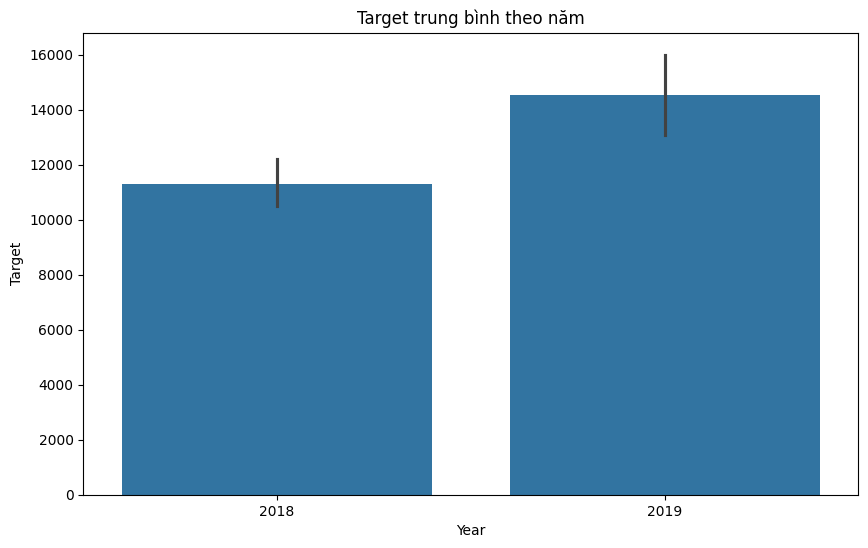

In [297]:
yearly_stats = df_Sales_target.groupby('Year')['Target'].mean()
print("\nTarget trung bình theo năm:")
print(yearly_stats)

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Target', data=df_Sales_target)
plt.title('Target trung bình theo năm')
plt.show()

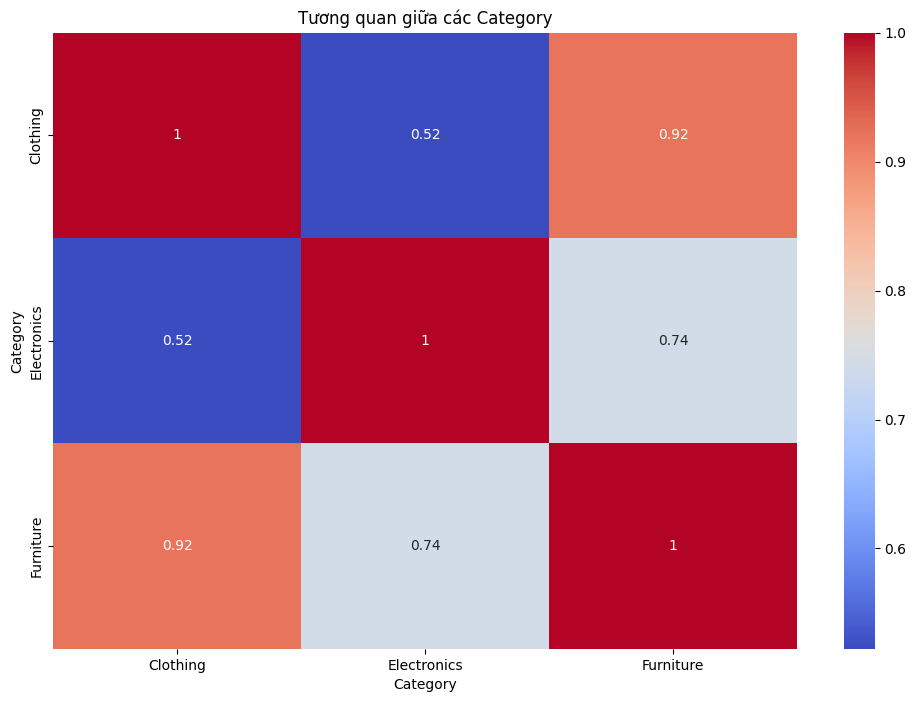

In [ ]:
pivot_data = df_Sales_target.pivot_table(
    index=['Year', 'Month'],
    columns='Category',
    values='Target'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data.corr(), annot=True, cmap='coolwarm')
plt.title('Tương quan giữa các Category')
plt.show()

In [301]:
print("\nCấu trúc df_List_of_Orders:")
print(df_List_of_Orders.columns)
print("\nMẫu dữ liệu:")
print(df_List_of_Orders.head())

print("Cấu trúc df_Order_Details:")
print(df_Order_Details.columns)
print("\nMẫu dữ liệu:")
print(df_Order_Details.head())

print("\nCấu trúc df_Sales_target:")
print(df_Sales_target.columns)
print("\nMẫu dữ liệu:")
print(df_Sales_target.head())


Cấu trúc df_List_of_Orders:
Index(['Order ID', 'Order Date', 'CustomerName', 'State', 'City'], dtype='object')

Mẫu dữ liệu:
  Order ID Order Date CustomerName           State       City
0  B-25601 2018-04-01       Bharat         Gujarat  Ahmedabad
1  B-25602 2018-04-01        Pearl     Maharashtra       Pune
2  B-25603 2018-04-03        Jahan  Madhya Pradesh     Bhopal
3  B-25604 2018-04-03       Divsha       Rajasthan     Jaipur
4  B-25605 2018-04-05      Kasheen     West Bengal    Kolkata
Cấu trúc df_Order_Details:
Index(['Order ID', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category'], dtype='object')

Mẫu dữ liệu:
  Order ID  Amount  Profit  Quantity     Category      Sub-Category
0  B-25601   737.5     9.0         7    Furniture         Bookcases
1  B-25601    66.0   -12.0         5     Clothing             Stole
2  B-25601     8.0    -2.0         3     Clothing       Hankerchief
3  B-25601    80.0   -56.0         4  Electronics  Electronic Games
4  B-25602   168.0     9.

In [302]:
df_merged = pd.merge(
    df_Order_Details,
    df_List_of_Orders,
    on='Order ID',
    how='left'
)

In [303]:
df_merged['Month'] = pd.to_datetime(df_merged['Order Date']).dt.month
df_merged['Year'] = pd.to_datetime(df_merged['Order Date']).dt.year

In [304]:
actual_sales = df_merged.groupby(['Category', 'Month', 'Year'])['Amount'].sum().reset_index()

In [308]:
df_Sales_target['Year'] = df_Sales_target['Year'].astype(int)

In [310]:
performance = pd.merge(
    actual_sales,
    df_Sales_target,
    on=['Category', 'Month', 'Year'],
    how='left'
)

In [311]:
performance['achievement_rate'] = (performance['Amount'] / performance['Target'] * 100).round(2)

In [312]:
print("\nKết quả sau khi merge và tính toán:")
print(performance.head())


Kết quả sau khi merge và tính toán:
   Category  Month  Year   Amount   Target  achievement_rate
0  Clothing      1  2019  12583.5  16000.0             78.65
1  Clothing      2  2019   8597.5  16000.0             53.73
2  Clothing      3  2019  17993.0  16000.0            112.46
3  Clothing      4  2018  10424.5  12000.0             86.87
4  Clothing      5  2018   8580.5  12000.0             71.50


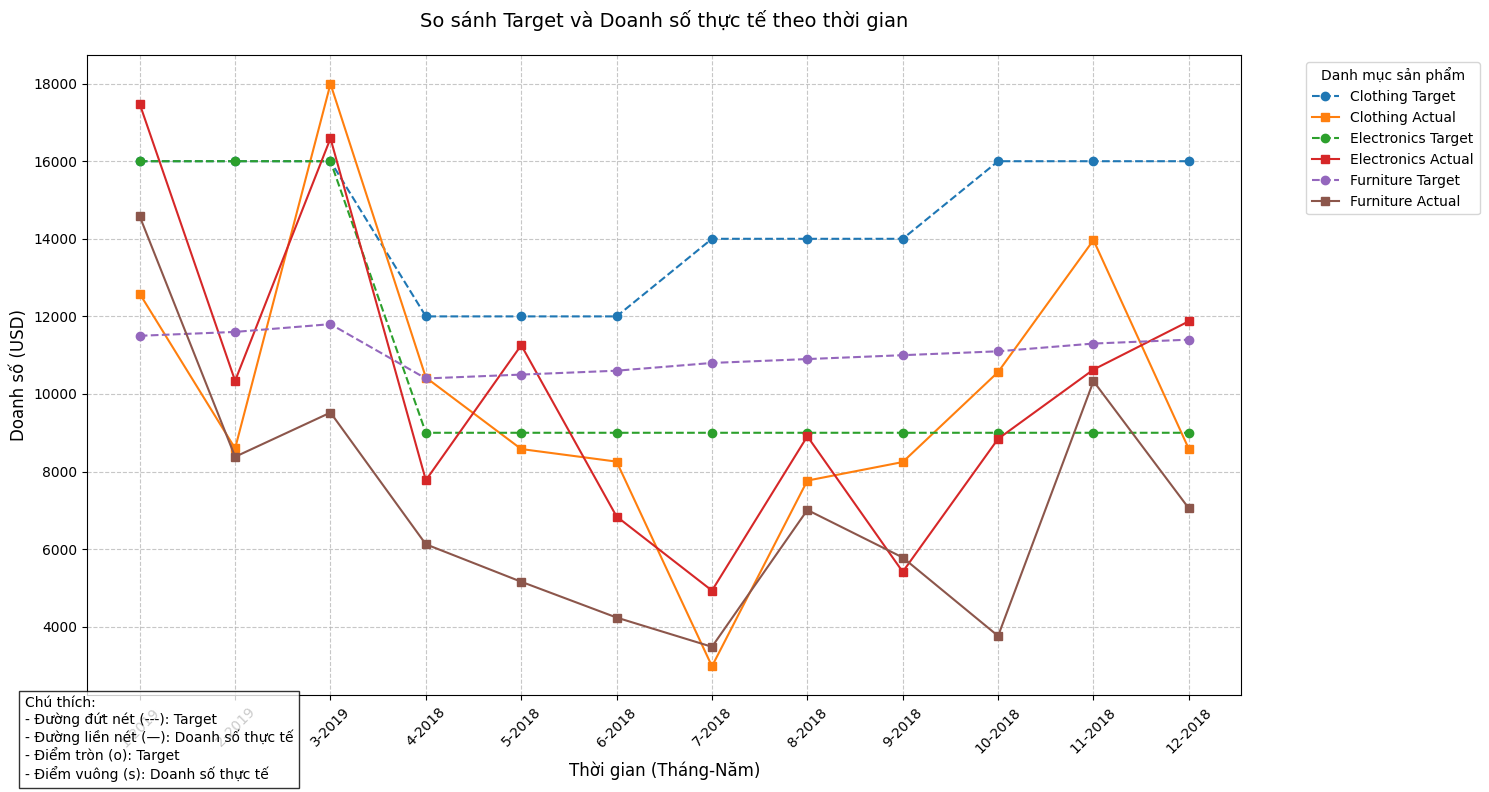


Tỷ lệ đạt Target theo Category:
Category
Clothing       67.89
Electronics    93.94
Furniture      63.67
Name: achievement_rate, dtype: float64

Tỷ lệ đạt Target trung bình: 75.17 %


In [317]:
plt.figure(figsize=(15, 8))

for category in performance['Category'].unique():
    category_data = performance[performance['Category'] == category]
    plt.plot(category_data['Month'].astype(str) + '-' + category_data['Year'].astype(str), 
             category_data['Target'], 
             marker='o', 
             label=f'{category} Target',
             linestyle='--')
    plt.plot(category_data['Month'].astype(str) + '-' + category_data['Year'].astype(str), 
             category_data['Amount'], 
             marker='s', 
             label=f'{category} Actual',
             linestyle='-')

plt.title('So sánh Target và Doanh số thực tế theo thời gian', fontsize=14, pad=20)
plt.xlabel('Thời gian (Tháng-Năm)', fontsize=12)
plt.ylabel('Doanh số (USD)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(title='Danh mục sản phẩm', 
          bbox_to_anchor=(1.05, 1), 
          loc='upper left')

plt.xticks(rotation=45)

plt.figtext(0.02, 0.02, 
           'Chú thích:\n'
           '- Đường đứt nét (---): Target\n'
           '- Đường liền nét (—): Doanh số thực tế\n'
           '- Điểm tròn (o): Target\n'
           '- Điểm vuông (s): Doanh số thực tế',
           fontsize=10,
           bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()

plt.show()

print("\nTỷ lệ đạt Target theo Category:")
print(performance.groupby('Category')['achievement_rate'].mean().round(2))
print("\nTỷ lệ đạt Target trung bình:", 
      performance['achievement_rate'].mean().round(2), "%")

In [318]:
subcategory_analysis = df_merged.groupby(['Category', 'Sub-Category']).agg({
    'Amount': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).reset_index()

print("\nPhân tích theo Sub-Category:")
print(subcategory_analysis)


Phân tích theo Sub-Category:
       Category      Sub-Category   Amount  Profit  Quantity
0      Clothing       Hankerchief  14051.0  2213.0       721
1      Clothing             Kurti   3361.0   273.0       164
2      Clothing          Leggings   2106.0   260.0       186
3      Clothing             Saree  47431.0  1396.0       749
4      Clothing             Shirt   6908.0  1120.0       246
5      Clothing             Skirt   1904.0   250.0       236
6      Clothing             Stole  17975.0  1990.0       659
7      Clothing           T-shirt   6797.0  1325.0       292
8      Clothing          Trousers  18011.5   231.0       135
9   Electronics       Accessories  18261.5  1091.0       251
10  Electronics  Electronic Games  30129.0   489.0       275
11  Electronics            Phones  31311.5   662.0       282
12  Electronics          Printers  41183.0  1331.0       278
13    Furniture         Bookcases  37966.5  1466.0       274
14    Furniture            Chairs  22650.0   212.0     

In [319]:
region_analysis = df_merged.groupby('State').agg({
    'Amount': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).reset_index()

print("\nPhân tích theo khu vực:")
print(region_analysis)


Phân tích theo khu vực:
                State   Amount  Profit  Quantity
0      Andhra Pradesh   9165.5   508.0       133
1               Bihar  10199.5   419.0       195
2               Delhi  17036.5  1366.0       277
3                 Goa   5408.5    94.0       134
4             Gujarat  15762.5  1009.0       317
5             Haryana   5936.0   149.0        91
6    Himachal Pradesh   6032.5   395.0       113
7   Jammu and Kashmir   9652.0   231.0       166
8           Karnataka  11913.5   519.0       169
9             Kerala   11075.0   310.0       157
10     Madhya Pradesh  75964.5  2310.0      1276
11        Maharashtra  69741.0  2786.0      1023
12           Nagaland   9758.0   575.0       173
13             Punjab  13362.0   705.0       216
14          Rajasthan  18312.0  1418.0       269
15             Sikkim   5276.0   181.0        93
16         Tamil Nadu   5342.0   376.0        91
17      Uttar Pradesh  12068.5   566.0       250
18        West Bengal  12848.0  1244.0      

In [322]:
customer_analysis = df_merged.groupby('CustomerName').agg({
    'Order ID': 'count',
    'Amount': 'sum',
    'Profit': 'sum'
}).reset_index()

print("\nPhân tích khách hàng:")
print(customer_analysis.sort_values('Amount', ascending=False).head(10))


Phân tích khách hàng:
    CustomerName  Order ID  Amount  Profit
8       Abhishek        24  5805.5   346.0
213     Priyanka        21  4913.0   287.0
6       Abhijeet        14  4728.5   339.0
296      Surabhi        12  4474.5    44.0
202        Pooja        17  4441.0   105.0
267       Shruti        16  4217.0   103.0
191      Parishi        10  4056.5   442.0
1        Aarushi        12  3956.0   268.0
40        Anurag        16  3946.0  -103.0
195        Parth         8  3850.0   246.0


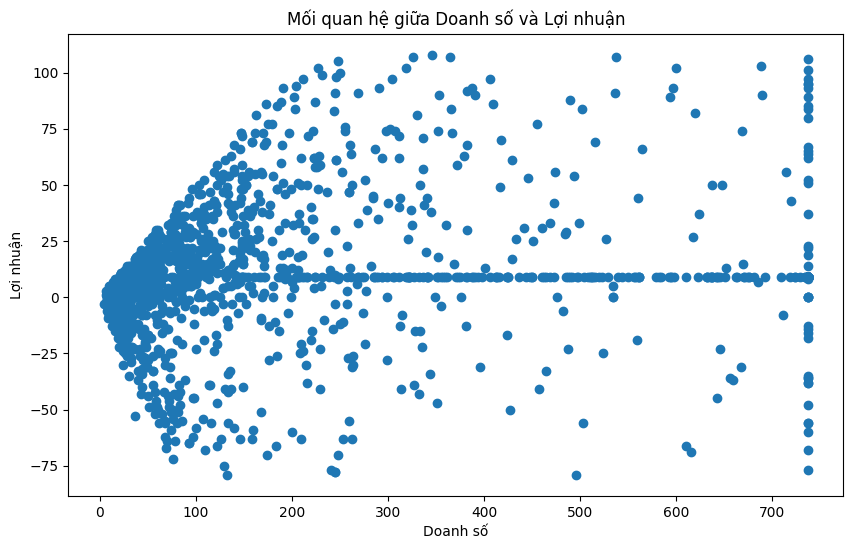

In [323]:
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['Amount'], df_merged['Profit'])
plt.title('Mối quan hệ giữa Doanh số và Lợi nhuận')
plt.xlabel('Doanh số')
plt.ylabel('Lợi nhuận')
plt.show()

In [324]:
df_merged['Season'] = pd.to_datetime(df_merged['Order Date']).dt.month.map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

seasonal_analysis = df_merged.groupby(['Category', 'Season']).agg({
    'Amount': 'sum',
    'Profit': 'sum'
}).reset_index()

print("\nPhân tích theo mùa vụ:")
print(seasonal_analysis)


Phân tích theo mùa vụ:
       Category  Season   Amount  Profit
0      Clothing    Fall  32778.0  2695.0
1      Clothing  Spring  36998.0  2424.0
2      Clothing  Summer  19005.0 -1070.0
3      Clothing  Winter  29763.5  5009.0
4   Electronics    Fall  24889.0   944.0
5   Electronics  Spring  35624.0   487.0
6   Electronics  Summer  20682.5  -273.0
7   Electronics  Winter  39689.5  2415.0
8     Furniture    Fall  19876.0   834.0
9     Furniture  Spring  20806.5   271.0
10    Furniture  Summer  14730.0  -441.0
11    Furniture  Winter  30011.5  1866.0
